**we have created a deep learning model which can create captions by watching a image. Used keras in order to create the model and used resnet pretrained model which is already available in keras and we have used resnet for extracting the features from the image.and used long short-term memory cells for predicting the captions.**

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

# Image Preprocess

In [2]:
# Added the Dataset from Kaggle Datasets.
images_path = '../input/flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')          # Glob function() used to read the image from the directory and just read the jpg files.
len(images)        #Length of the Images

8091

In [3]:
images[:5]

['../input/flickr8k-sau/Flickr_Data/Images/3226254560_2f8ac147ea.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/214543992_ce6c0d9f9b.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2366643786_9c9a830db8.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3368819708_0bfa0808f8.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2190227737_6e0bde2623.jpg']

# Visualizing the Five Images

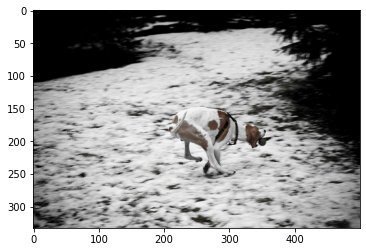

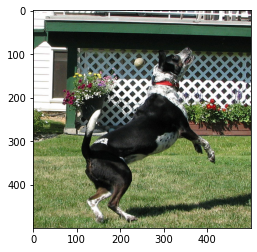

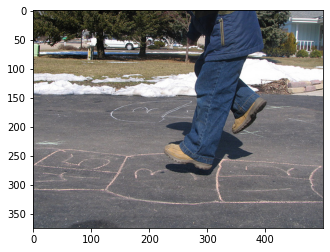

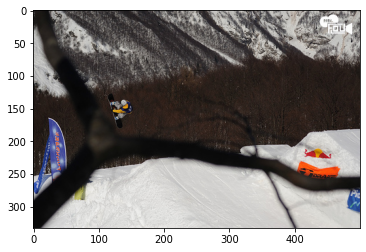

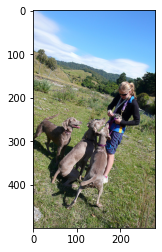

In [4]:
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])                       # Reading the Path of the Images.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                    #Converting the Image into RGB.
    plt.imshow(img)

# Importing the Pre Trained Model RESNET50 to extract the features from the images

In [5]:
# ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images
from keras.applications import ResNet50                     

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [6]:
incept_model.summary()     #Summary of the model

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Discarding the Last Layer and the second last layer will be the output:

In [7]:
#We have to discard the prediction layer and want the output avg_pooling laye which is the second Last layer.
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Transfering all the images to RESNET model to get Vectors

In [8]:
#Create a dictionary key will the name of the lmage and the value will be the vector of that image.
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            #Cv2 reads the image from the RGB format that the resason to the convert it into RGB.
    img = cv2.resize(img, (224,224))              #Resize the image because the input size required to give RESNET is (244,244,3).
    
    img = img.reshape(1,224,224,3)                 #Reshape to transfer the image to the resnet model.
    pred = modele.predict(img).reshape(2048,)        #Predicting the image vector of 2048 values.
        
    img_name = i.split('/')[-1]                  #Spliting is done to extract just the name of the image from the complete path of image.
    
    images_features[img_name] = pred              #Earlier Create dictionary will contain the image name as the key and the value will the 2048 values of the image vector.
    
    count += 1
    
    #We are just working on 1500 images from the dataset due to memory limitations so under loop count will be 1499 the loop will be break down. 
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    
        

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [9]:
# Printing the length of the images and its features.
len(images_features)

1500

# Text Preprocess

In [10]:
# Assigning the path of token.txt
caption_path = '../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [11]:
# Reading the caption_path and spliting it with new line.
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [12]:
# Ex: The 5 captions different captions for 2 different images.
captions[:10]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

In [13]:
#total Loength of captions of all the images
len(captions)

40461

In [14]:
#Created a Dictionary which will have image Name as the key and the values will the list of captions of an all the images.
captions_dict = {}

for i in captions:
    try:
        img_name = i.split('\t')[0][:-2]                       #Spliting the name of image.
        caption = i.split('\t')[1]                             #Spliting the caption.
        
        # Appending the all the captions as values in dictionary of a specific image.
        if img_name in images_features:                            
            if img_name not in captions_dict:                               
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)             
            
    except:
        pass

In [15]:
# Ex: Checking the five Captions of the image.
captions_dict['1002674143_1b742ab4b8.jpg']

['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
 'A little girl is sitting in front of a large painted rainbow .',
 'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
 'There is a girl with pigtails sitting in front of a rainbow painting .',
 'Young girl with pigtails painting outside in the grass .']

In [16]:
# Total length of dictionary
len(captions_dict)

1500

# Adding start and End Tokens to all the captions:

In [17]:
#Function to add start and end tokens to all the captions
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [18]:
#Token added 
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)
captions_dict['1002674143_1b742ab4b8.jpg']

['startofseq a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . endofseq',
 'startofseq a little girl is sitting in front of a large painted rainbow . endofseq',
 'startofseq a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it . endofseq',
 'startofseq there is a girl with pigtails sitting in front of a rainbow painting . endofseq',
 'startofseq young girl with pigtails painting outside in the grass . endofseq']

# Create Vocabulary

In [19]:
# Dictionary which will store vocabulary and it's respective numeric value.
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:                       # vv is the list of 5 captions of each image
        for word in v.split():                 #spliting the captions into words to get vocabulory.
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [20]:
# count_words

In [21]:
len(count_words)

4073

In [22]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [23]:
new_dict

{'startofseq': 1,
 'a': 2,
 'little': 3,
 'girl': 4,
 'covered': 5,
 'in': 6,
 'paint': 7,
 'sits': 8,
 'front': 9,
 'of': 10,
 'painted': 11,
 'rainbow': 12,
 'with': 13,
 'her': 14,
 'hands': 15,
 'bowl': 16,
 '.': 17,
 'endofseq': 18,
 'is': 19,
 'sitting': 20,
 'large': 21,
 'small': 22,
 'the': 23,
 'grass': 24,
 'plays': 25,
 'fingerpaints': 26,
 'white': 27,
 'canvas': 28,
 'on': 29,
 'it': 30,
 'there': 31,
 'pigtails': 32,
 'painting': 33,
 'young': 34,
 'outside': 35,
 'man': 36,
 'drilling': 37,
 'hole': 38,
 'ice': 39,
 'through': 40,
 'frozen': 41,
 'pond': 42,
 'person': 43,
 'snow': 44,
 'standing': 45,
 'lake': 46,
 'two': 47,
 'men': 48,
 'are': 49,
 'fishing': 50,
 'different': 51,
 'breeds': 52,
 'brown': 53,
 'and': 54,
 'dogs': 55,
 'play': 56,
 'beach': 57,
 'making': 58,
 'turn': 59,
 'soft': 60,
 'sand': 61,
 'playing': 62,
 'at': 63,
 'together': 64,
 'tan': 65,
 'along': 66,
 'sandy': 67,
 'tent': 68,
 'being': 69,
 'set': 70,
 'up': 71,
 'about': 72,
 'to': 7

In [24]:
len(new_dict)

4073

In [25]:
new_dict['<OUT>'] = len(new_dict) 

In [26]:
len(new_dict)

4074

In [27]:
captions_backup = captions_dict.copy()

In [28]:
captions_dict = captions_backup.copy()

# Now assigning numerical values of words in the captions Dictionary

In [29]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [30]:
# captions_dict

# **Build Generator Function**

In [31]:
from keras.utils import to_categorical                # Converts a class vector (integers) to binary class matrix.
from keras.preprocessing.sequence import pad_sequences                            # pad_sequences is used to ensure that all sequences in a list have the same length     

In [32]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 180, 190, 6, 2, 77, 191, 54, 77, 192, 193, 2, 53, 194, 121, 2, 41, 46, 54, 195, 196, 17, 18]
[1, 23, 131, 6, 23, 77, 122, 19, 706, 2, 700, 701, 467, 2, 128, 265, 23, 131, 6, 23, 245, 385, 707, 73, 621, 151, 93, 17, 18]
[1, 23, 47, 34, 178, 49, 6, 126, 54, 27, 1049, 54, 1050, 318, 281, 6, 2, 1051, 81, 322, 49, 69, 1052, 279, 2, 36, 1053, 6, 1049, 54, 2, 364, 18]
[1, 318, 188, 27, 205, 19, 35, 23, 156, 81, 472, 27, 205, 13, 2, 126, 2264, 29, 442, 298, 19, 149, 83, 2, 626, 465, 156, 318, 147, 567, 279, 2, 523, 1103, 17, 18]


In [33]:
MAX_LEN

36

In [34]:
# captions_dict

In [35]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []          # Ex : <sos>
    y_in = []       # Ex : cat
    y_out = []       # predicted word
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])           # Append the image features to X variable.

                in_seq= [v[:i]]          # Spliting the word according to the i variable.
                out_seq = v[i]              # The next word.

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]   # Ensuring the the captions are of same length by assigning 0.          
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]             

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [36]:
X, y_in, y_out = generator(images_features, captions_dict)

In [37]:
# Converting in Numpy array for processing  Faster
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [38]:
X.shape, y_in.shape, y_out.shape

((96528, 2048), (96528, 36), (96528, 4074))

In [39]:
#Ex. 
X[1510]

array([1.4754434 , 0.21838042, 0.14905131, ..., 1.4680874 , 0.660953  ,
       0.        ], dtype=float32)

In [40]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

# **MODEL**

In [41]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [42]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 36, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 128)           521472    
_________________________________________________________________
lstm (LSTM)                  (None, 36, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 36, 128)           32896     
Total params: 948,608
Traina

In [43]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

Epoch 1/100
189/189 [==============================] - 16s 65ms/step - loss: 5.4210 - accuracy: 0.1379
Epoch 2/100
189/189 [==============================] - 12s 66ms/step - loss: 4.5926 - accuracy: 0.2315
Epoch 3/100
189/189 [==============================] - 12s 65ms/step - loss: 4.4002 - accuracy: 0.2539
Epoch 4/100
189/189 [==============================] - 12s 66ms/step - loss: 4.2727 - accuracy: 0.2665
Epoch 5/100
189/189 [==============================] - 12s 66ms/step - loss: 4.1727 - accuracy: 0.2760
Epoch 6/100
189/189 [==============================] - 12s 65ms/step - loss: 4.0136 - accuracy: 0.2902
Epoch 7/100
189/189 [==============================] - 13s 66ms/step - loss: 3.8336 - accuracy: 0.3062
Epoch 8/100
189/189 [==============================] - 12s 65ms/step - loss: 3.6733 - accuracy: 0.3235
Epoch 9/100
189/189 [==============================] - 12s 65ms/step - loss: 3.5344 - accuracy: 0.3362
Epoch 10/100
189/189 [==============================] - 12s 66ms/step - l

In [44]:
inv_dict = {v:k for k, v in new_dict.items()}

In [45]:
model.save('model.h5')

In [46]:
model.save_weights('mine_model_weights.h5')

In [47]:
np.save('vocab.npy', new_dict)

In [48]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# **PREDICTIONS**

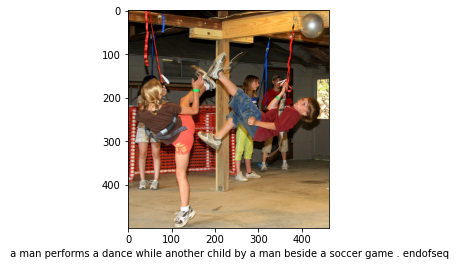

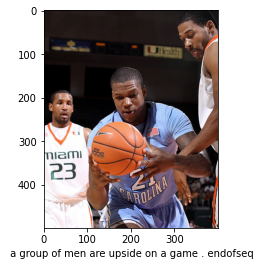

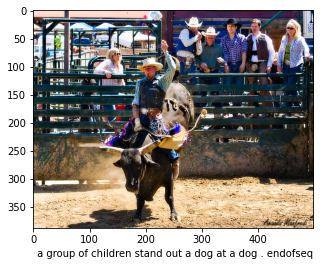

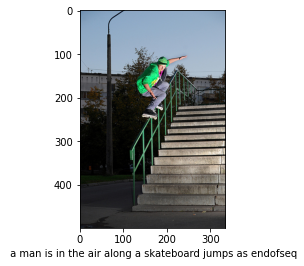

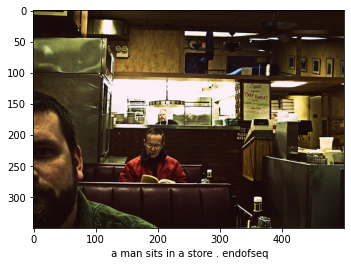

In [49]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)